<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Unsupervised_ML_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-Means**

In [0]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

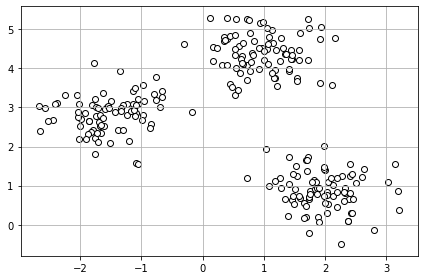

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black')

plt.grid()
plt.tight_layout()

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init = 'random', n_init = 10, max_iter = 300, tol=1e-04, random_state = 42)

y_km = km.fit_predict(X)

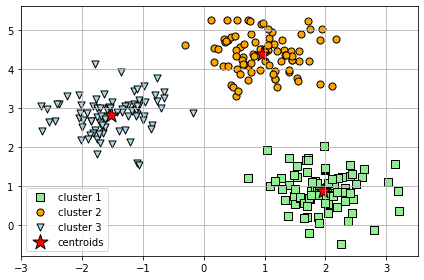

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

### **Exercise**

In [7]:
import pandas as pd

# import the data
data = pd.read_csv('https://raw.githubusercontent.com/dipanjanS/appliedml_workshop_dhs_av_2019/master/Module%2011%20-%20Unsupervised%20ML%20-%20Clustering/data/Wine_Quality_Data.csv')

data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0,0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11,25,15,17
total_sulfur_dioxide,34,67,54,60
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [0]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# the correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
  corr_mat.iloc[x, x]= 0.0

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

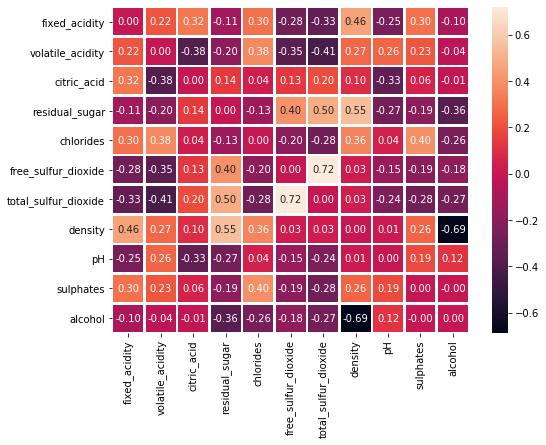

In [13]:
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, linewidths=1.5, fmt='.2f', ax=ax);

In [14]:
# Pairwise matrix correlations
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

In [17]:
skew_columns = (data[float_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [0]:
import numpy as np

In [0]:
# Perform Log transform on skewed columns
for col in skew_columns.index.tolist():
  data[col] = np.log1p(data[col])

### **Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red


### **Pairplots after transformation**

In [0]:
# custom colors
red = sns.color_palette()[1]
white = 'gray'

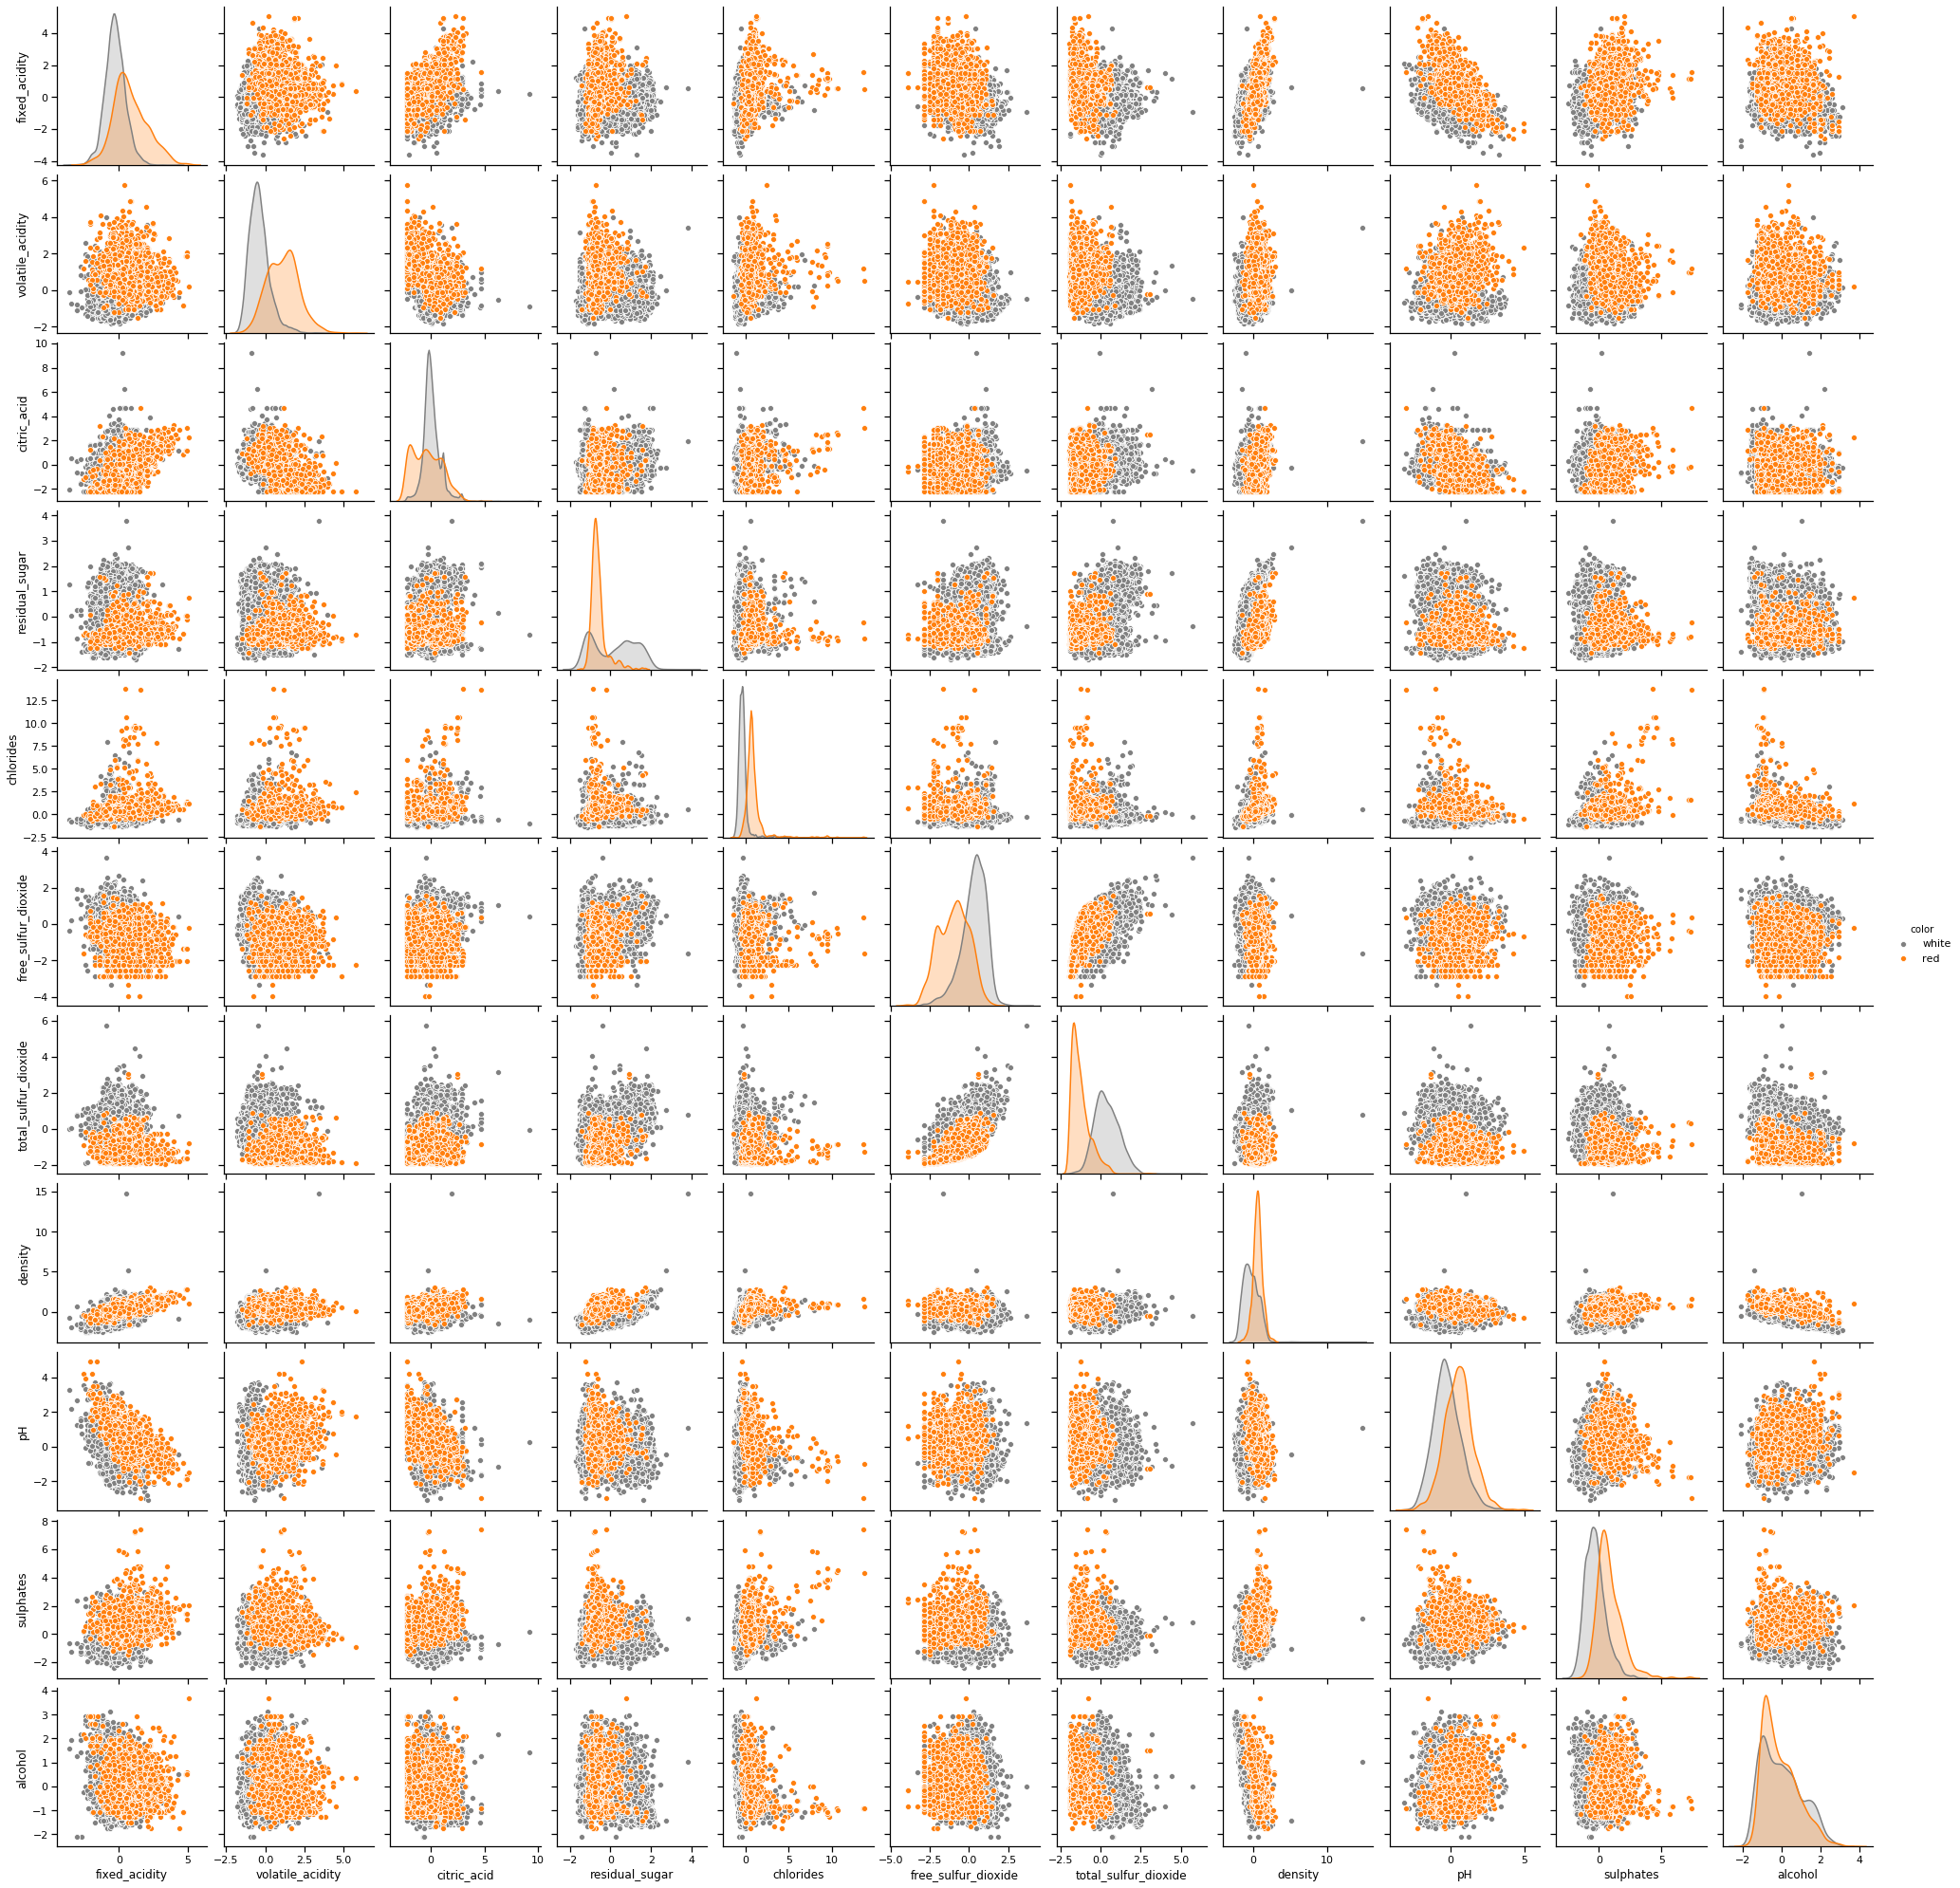

In [25]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'], 
             palette={'red' : red, 'white' : 'gray'});

## **K-Means with 2 clusters**

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [29]:
(data[['color','kmeans']].groupby(['color', 'kmeans']).size().to_frame().rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

### **K-Means with cluster 1-20**

In [0]:
km_list = list()

for clust in range(1,20):
  km = KMeans(n_clusters= clust, random_state=42)
  km = km.fit(data[float_columns])

# Inertia - Sum of squared distances of samples to their closest cluster center

  km_list.append(pd.Series({'clusters': clust, 'inertia': km.inertia_, 'model': km}))

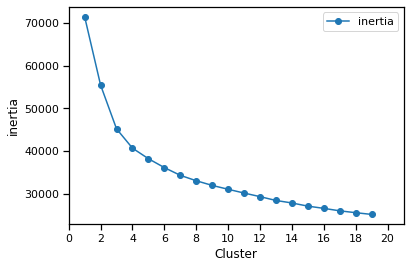

In [31]:
plot_data = (pd.concat(km_list, axis=1).T[['clusters', 'inertia']].set_index('clusters'))

ax = plot_data.plot(marker ='o', ls = '-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='inertia'); 

## **Agglomerative cluster with 2 clusters**

In [0]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

In [33]:
(data[['color', 'agglom', 'kmeans']].groupby(['color', 'agglom', 'kmeans']).size().to_frame().rename(columns={0:'number'}))

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

In [0]:
from scipy.cluster import hierarchy
from matplotlib import colors

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

#Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[1])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendogram(Z, orientation='top')